In [5]:
#Only uncomment and run this in colab if needed, then restart runtime
# !pip install xport

#Run this if needed, no need to restart
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 5.9 MB/s eta 0:00:00


In [6]:
#Run in colab once to open a kernel
from google.colab import drive
import h5py

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#If xport does not run, run pip install at top
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt




In [8]:
file_path =   "/content/drive/MyDrive/health_project/medical_conditions_age_based_cleaned.csv"

health_df = pd.read_csv(file_path)
health_df['heart_attack']

0        0
1        0
2        0
3        0
4        0
        ..
14885    0
14886    0
14887    0
14888    0
14889    1
Name: heart_attack, Length: 14890, dtype: int64

In [9]:
# Get dummies if needed

#number_health_df = pd.get_dummies(health_df)
#number_health_df

# number_health_df.to_csv("/content/drive/MyDrive/health_project/Resources/xyz.csv")

In [21]:
#Split our preprocessed data into our features and target arrays
# X = number_health_df.drop(["heart_attack"],1).values 
negative,positive =list(health_df.groupby('heart_attack'))
_, pos_df = positive
_, neg_df = negative
neg_df = neg_df.reset_index(drop=True)
pos_df = pos_df.reset_index(drop=True)

# Get double the number of negative samples
negative_sample_rate = pos_df.shape[0] * .75 *2 / neg_df.shape[0]

#Split the preprocessed data into a training and testing dataset
neg_train, neg_test = train_test_split(neg_df, train_size=negative_sample_rate, random_state=42)
pos_train, pos_test = train_test_split(pos_df, train_size=.75, random_state=42)

train = pd.concat([neg_train, pos_train]).sample(frac=1).reset_index(drop=True)
test = pd.concat([neg_test, pos_test]).sample(frac=1).reset_index(drop=True)

X_train = train.drop(["heart_attack","heart_attack_age","max_age","id"], axis=1)
y_train = train["heart_attack"]

X_test = test.drop(["heart_attack","heart_attack_age", "max_age","id"], axis=1)
y_test = test["heart_attack"]

In [22]:
print(X_test.shape, y_test.shape, X_train.shape, y_train.shape)
print(X_test.columns)

(13954, 35) (13954,) (936, 35) (936,)
Index(['asthma_age', 'ever_overweight', 'heart_failure_age',
       'age_chronic_heart_disease', 'angina_pectoris_age', 'stroke_age',
       'thyroid_age', 'liver_age', 'fatty_liver', 'liver_fibrosis',
       'liver_cirrhosis', 'liver_viral_hepatitis',
       'liver_autoimmune_hepatitis', 'other_liver_disease',
       'gallbladder_pr_age', 'relative_asthma', 'relative_diabetes',
       'relative_heart_attack', 'asthma', 'heart_failure',
       'chronic_heart_disease', 'angina_pectoris', 'stroke', 'thyroid',
       'liver', 'gallbladder_pr', 'asthma_yrs', 'heart_failure_yrs',
       'chronic_heart_disease_yrs', 'angina_pectoris_yrs', 'stroke_yrs',
       'thyroid_yrs', 'liver_disease_yrs', 'gallbladder_pr_yrs',
       'liver_disease'],
      dtype='object')


In [23]:
X_train

,asthma_age,ever_overweight,heart_failure_age,age_chronic_heart_disease,angina_pectoris_age,stroke_age,thyroid_age,liver_age,fatty_liver,liver_fibrosis,...,gallbladder_pr,asthma_yrs,heart_failure_yrs,chronic_heart_disease_yrs,angina_pectoris_yrs,stroke_yrs,thyroid_yrs,liver_disease_yrs,gallbladder_pr_yrs,liver_disease
0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,69.0,1,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
931,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
932,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
933,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
934,0.0,1,55.0,55.0,0.0,0.0,45.0,0.0,0,0,...,1,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1


In [24]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=1,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [25]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


In [26]:
# Model may not be tuned (hyper parameters, number of layers, number of neurons etc)

# keras tuner 

# Work with these, see report
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(20, activation="relu", input_shape=([35])))

# Second hidden layer
nn.add(tf.keras.layers.Dense(30, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                720       
                                                                 
 dense_4 (Dense)             (None, 30)                630       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,381
Trainable params: 1,381
Non-trainable params: 0
_________________________________________________________________


In [27]:
# Compile the data
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy", tf.keras.metrics.Recall(), tf.keras.metrics.Precision()])

In [29]:
# Train the model
csv_logger = tf.keras.callbacks.CSVLogger('/content/drive/MyDrive/neural_network_no_opt.csv')
fit_model = nn.fit(X_train_scaled,y_train,epochs=75, callbacks=[callback, csv_logger], validation_split=.25)

Epoch 1/75
22/22 [==============================] - 2s 17ms/step - loss: 0.5483 - accuracy: 0.8533 - recall_1: 0.9664 - precision_1: 0.7077 - val_loss: 0.4201 - val_accuracy: 0.9744 - val_recall_1: 1.0000 - val_precision_1: 0.9250
Epoch 2/75
22/22 [==============================] - 0s 5ms/step - loss: 0.3180 - accuracy: 0.9786 - recall_1: 0.9832 - precision_1: 0.9551 - val_loss: 0.2186 - val_accuracy: 0.9915 - val_recall_1: 1.0000 - val_precision_1: 0.9737
Epoch 3/75
22/22 [==============================] - 0s 4ms/step - loss: 0.1551 - accuracy: 0.9886 - recall_1: 0.9916 - precision_1: 0.9752 - val_loss: 0.1041 - val_accuracy: 1.0000 - val_recall_1: 1.0000 - val_precision_1: 1.0000
Epoch 4/75
22/22 [==============================] - 0s 4ms/step - loss: 0.0768 - accuracy: 0.9943 - recall_1: 0.9958 - precision_1: 0.9875 - val_loss: 0.0545 - val_accuracy: 1.0000 - val_recall_1: 1.0000 - val_precision_1: 1.0000
Epoch 5/75
22/22 [==============================] - 0s 4ms/step - loss: 0.0432 

In [30]:
nn.evaluate(X_test_scaled,y_test,verbose=2)

437/437 - 1s - loss: 0.0045 - accuracy: 0.9984 - recall_1: 1.0000 - precision_1: 0.8189 - 554ms/epoch - 1ms/step


[0.004549059551209211, 0.9983517527580261, 1.0, 0.8188976645469666]

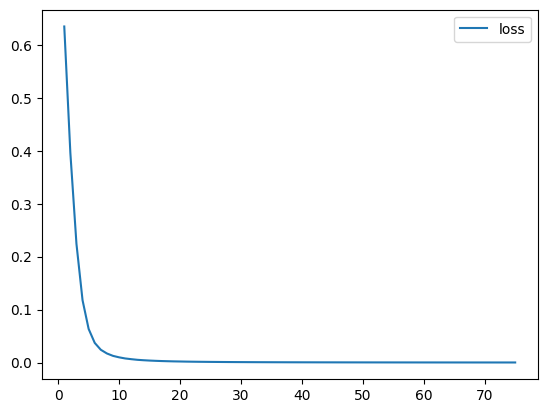

In [19]:
history_df = pd.DataFrame(fit_model.history)
history_df.index += 1
history_df.plot(y="loss")
plt.show()

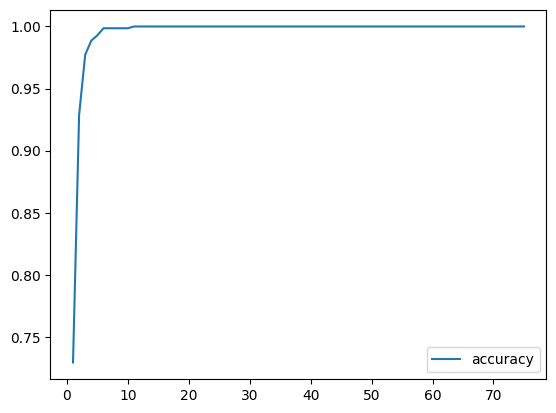

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()